In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("train/mnist_train.csv")
test_data = pd.read_csv("test/mnist_test.csv")
df.head()

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

In [6]:
print(df.shape)
print(test_data.shape)

(60000, 785)
(10000, 785)


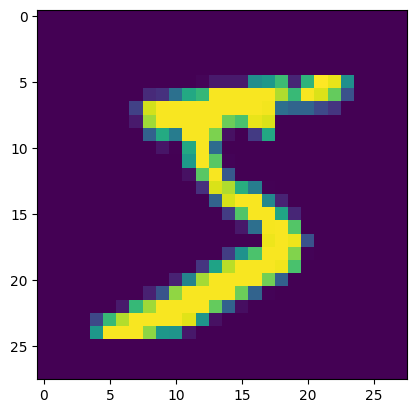

In [9]:
plt.imshow(df.iloc[0,1:].values.reshape(28,28))

In [22]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9715

In [17]:
#using PCA to implement KNN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()

In [24]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [ ]:
score = []
for i in range(1,785):
    pca = PCA(n_components = i)
    x_train_trf=pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)
    knn = KNeighborsClassifier()
    knn.fit(x_train_trf,y_train)
    ypred_trf = knn.predict(x_test_trf)
    score.append(accuracy_score(y_test,ypred_trf))
    

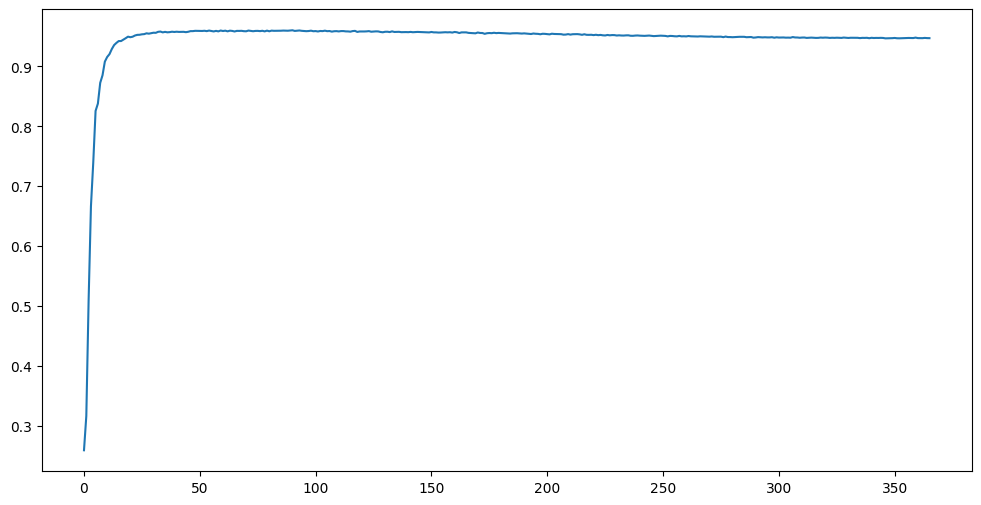

In [34]:
plt.figure(figsize=(12,6))
plt.plot(score)
plt.show()

In [43]:
#transforming to 2d coordinate system
pca = PCA(n_components =2)
x_train_trf = pca.fit_transform(x_train)
x_test_test = pca.transform(x_test)

In [44]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x =x_train_trf[:,0],
                 y = x_train_trf[:,1],
                 color = y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [45]:
pca = PCA(n_components = 3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [47]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df,x =x_train_trf[:,0],
                 y = x_train_trf[:,1],
                 z = x_train_trf[:,2],
                 color = y_train_trf)
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show()

In [48]:
pca.explained_variance_ #Top 3 highest eigenvalues

array([40.65780534, 29.35286729, 26.7254227 ])

In [49]:
pca.components_ #top three eigenvectors in 784 dimensional space

array([[-9.63901897e-19, -6.64389338e-20,  1.26649574e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.52916189e-17, -1.04082150e-18, -2.25761402e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.11553164e-18,  7.41585137e-18,  2.40875332e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])